In [1]:
import pandas as pd                 # Data tables
import os                           # Returns current directory, create files
import numpy as np                  # Arrays
import matplotlib.pyplot as plt	    # Graphs

from math import sqrt, atan, log

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import *

from Heat_loads_lighting_CLF_230318 import *

pd.options.display.max_columns = 999

# DATA

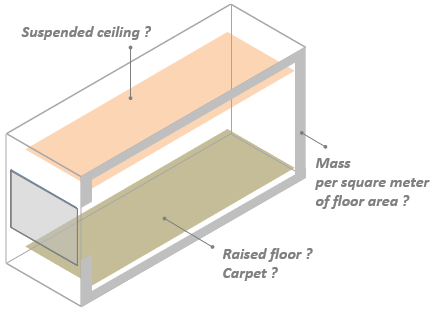

In [2]:
# Wall thermal mass accessibility from internal side: 1 = True, 0 = False
suspended_ceiling = 0
raised_floor      = 0
carpet            = 0

# Average internal mass per square meter of floor area, in [kg/m2] 
M_A               = 387.32

In [3]:
# Proportion of radiative heat gains : comprised between 0 and 1
f_radiative       = 0

# Daily occupancy hours comprised between 0 and 24 h
hour_start_occ    = 7
hour_stop_occ     = 23

# Daily Plant operating hours comprised between 0 and 24 h
hour_start_plant  = 5
hour_stop_plant   = 23

In [4]:
dfl, dfp, dfc = CLF(suspended_ceiling, raised_floor, carpet, M_A, \
          f_radiative, hour_start_occ, hour_stop_occ, hour_start_plant, hour_stop_plant, method="LSODA")

# Default : method="LSODA"
# Other   :  method="Radau", method="RK45" 

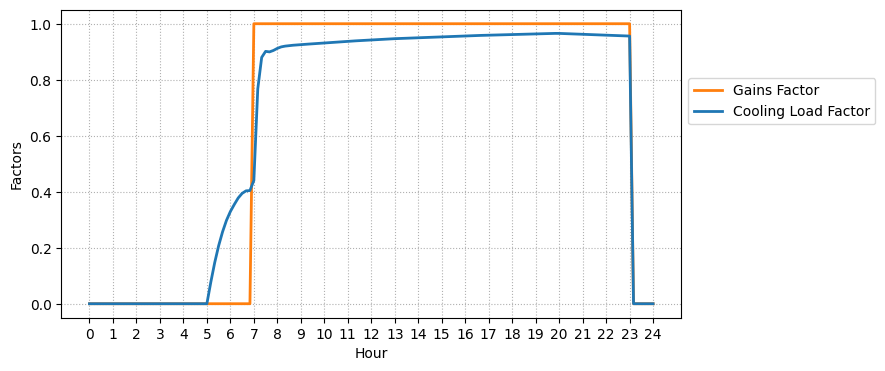

In [5]:
plt.figure(figsize = (8,4))
plt.xticks(np.arange(0, dfl['hour_per'].values[-1] + 1 , 1))
plt.plot(dfl['hour_per'], dfl['GF'], color= 'C1', linewidth=2.0, label="Gains Factor")
plt.plot(dfl['hour_per'], dfl['CLF'], color= 'C0', linewidth=2.0, label="Cooling Load Factor")
plt.xlabel('Hour')
plt.ylabel('Factors')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.grid(linestyle= 'dotted')

In [6]:
dfp.T

hour_per,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CLF,0.0,0.0,0.0,0.0,0.0,0.0,0.33,0.44,0.91,0.93,0.93,0.94,0.94,0.95,0.95,0.95,0.96,0.96,0.96,0.96,0.97,0.96,0.96,0.96,0.0


In [7]:
dfc.T.to_clipboard(index=False)